## Statistics
Statistics is the science of collecting, analysing, interpreting and presenting data.

It forms the foundation for data driven decision making

## Types of Statistics
- Descriptive Statistics: Summarize data (mean, median, mode, standard deviation, variance etc)
- Inferential Statistics: Make predictions or inferences about a population based on a sample

## Population vs Sample
- Population: The entire group you want to study
- Sample: a subset of the population

## Types of Sampling
- Random Sampling: Every element has an equal chance of being selected
- Stratified Sampling: Population divided into subgroups(strata) then sampled
- Systematic Sampling: Every nth item is selected
- Cluster sampling: Population divided into clusters then some clusters are randomly selected

## Scales of Measurement
- Normal: Categories withour order(eg gender)
- Ordinal: Ordered categories(eg educational level)

## Descriptive Statistics
### Measures of Central Tendency
- Mean: Average value
- Median: Middle value
- Mode: Most frequent value
### Measures of Dispersion
- Range: Max- Min
- Variance: Average of squared deviations from the mean
- Standard Deviation: Square root of variance

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df =pd.read_csv("../Datasets/StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# random sampling
df.sample(n=10, random_state=3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
642,female,group B,some high school,free/reduced,none,72,81,79
762,male,group D,some high school,standard,completed,78,81,86
909,male,group E,bachelor's degree,standard,completed,70,64,70
199,female,group B,bachelor's degree,free/reduced,none,78,79,76
586,female,group A,high school,standard,none,55,73,73
797,female,group E,associate's degree,free/reduced,none,70,84,81
652,female,group D,some college,standard,completed,85,86,98
755,female,group E,associate's degree,standard,none,84,95,92
416,male,group C,bachelor's degree,standard,completed,71,74,68
498,female,group B,some high school,standard,none,66,69,68


In [6]:
# systematic sampling
# select every tenth student
df.iloc[::10]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
10,male,group C,associate's degree,standard,none,58,54,52
20,male,group D,high school,standard,none,66,69,63
30,female,group D,some college,standard,none,69,74,74
40,male,group C,associate's degree,free/reduced,none,55,61,54
...,...,...,...,...,...,...,...,...
950,male,group E,high school,standard,none,94,73,71
960,female,group A,some college,standard,none,56,58,64
970,female,group D,bachelor's degree,standard,none,89,100,100
980,female,group B,high school,free/reduced,none,8,24,23


In [7]:
#stratified sampling
# randomly select 5 students from each gender
strat_sample = df.groupby("gender", group_keys=False).apply(lambda x: x.sample(n=5, random_state=1))

strat_sample

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
947,female,group D,some college,free/reduced,none,49,58,60
552,female,group B,associate's degree,standard,none,40,48,50
816,female,group A,bachelor's degree,standard,none,45,59,64
620,female,group C,high school,free/reduced,none,35,61,54
517,female,group E,some college,standard,completed,66,74,73
62,male,group A,associate's degree,free/reduced,none,62,61,55
482,male,group C,some college,free/reduced,none,68,68,61
358,male,group D,some college,free/reduced,none,59,62,61
218,male,group B,high school,free/reduced,none,66,77,70
184,male,group C,some high school,free/reduced,completed,45,52,49


In [8]:
df["math score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

## Shape of Distribution
- Skewness: Measures asymmetry

Positive skew: tail on right

Zero skew: distribution is symmetric

Negative skew: tail on left

- Kurtosis: measures 'tailedness' of the distribution

Normal distribution = 3

Negative distribution < 3 (FLAT PEAK)

Positive kurtosis > 3 (SHARP PEAK)

### Outliers & Boxplots
OUtliers are data points that are far from other observations.

Boxplots visualize:
- Median
- Interquartile Range (IQR)
- Outliers (dots outside whiskers)

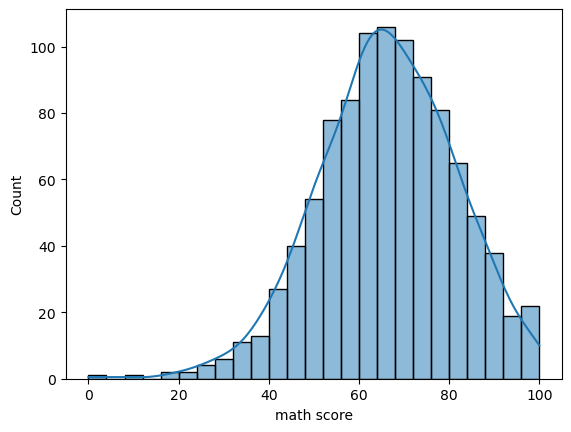

In [11]:
sns.histplot(df["math score"], kde=True)
plt.show()

In [12]:
skew_math = skew(df["math score"])

skew_math

-0.278516571914075

In [13]:
kurt_math = kurtosis(df["math score"], fisher=False)

kurt_math

3.2675971546149785

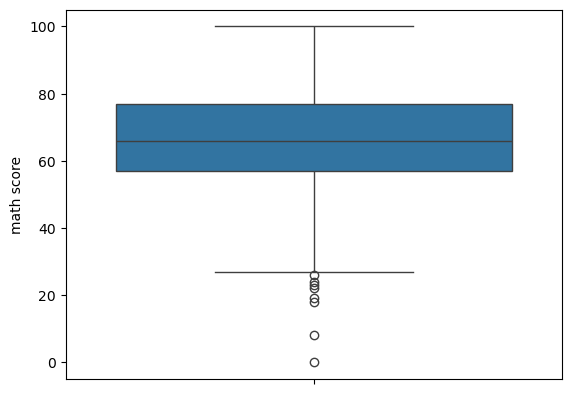

In [14]:
sns.boxplot(y=df["math score"])
plt.show()

In [17]:
Q1 = df["math score"].quantile(0.25)
Q1

57.0

In [18]:
Q3 = df["math score"].quantile(0.75)

Q3

77.0

In [19]:
IQR = Q3 - Q1

In [20]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [22]:
lower


27.0

In [23]:
upper

107.0

In [25]:
df[~((df["math score"] < lower) | (df["math score"] > upper))]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
df.shape

(1000, 8)